## Method or Stepsize
This notebook illustrates the choice of step size and method using the 2nd order Runge Kutta and 3rd order Runge Kutta method to approximate the initial value problem
$$ y′=t−y,  (0 \leq t \leq 4) $$
with the initial condition
$$ y(0) = 0 $$

### Setting up Libraries


In [1]:
import numpy as np
import math 

%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import warnings

warnings.filterwarnings("ignore")
class ListTable(list):
    """ Overridden list class which takes a 2-dimensional list of 
        the form [[1,2,3],[4,5,6]], and renders an HTML Table in 
        IPython Notebook. """
    
    def _repr_html_(self):
        html = ["<table>"]
        for row in self:
            html.append("<tr>")
            
            for col in row:
                html.append("<td>{0}</td>".format(col))
            
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)

## Defining the function
$$ f(t,y)=t−y $$

In [2]:
def myfun_ty(t,y):
    return t-y

## Discrete Interval
Here we will use two different steps sizes on the  $ 0 \leq t \leq 2 $.
### First Interval
In the first interval there will be  $2^2 = 4$ steps giving
$$ \frac{2 - 0}{4} = 0.5 $$
with the discrete time steps,
$$ t_{i} = 0 + i0.5 $$
for  $i=0,1,...,4$.
### Second Interval
In the second interval there will be  $2^3 = 8$ steps giving
$$ \frac{2 - 0}{8} = 0.25 $$
with the discrete time steps,
$$ t_{i} = 0 + i0.25 $$
for  $i=0,1,...,8$.


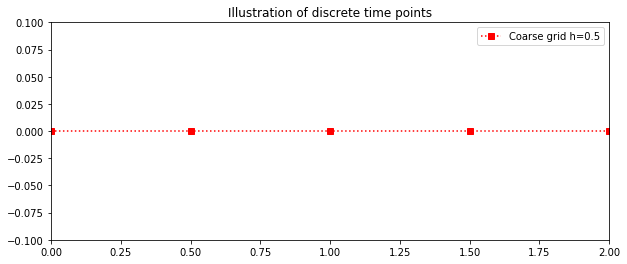

In [3]:
# Start and end of interval
b=2
a=0
# Step size
N1=4
h1=(b-a)/(N1)
N2=8
h2=(b-a)/(N2)
t1=np.arange(a,b+h1,h1)
t2=np.arange(a,b+h2,h2)

fig = plt.figure(figsize=(10,4))
plt.plot(t1,0*t1,'s:',color='red',label='Coarse grid h=%s'%(h1))
#plt.plot(t2,0.01*np.ones(len(t2)),'o:',color='purple',label='Fine Grid h=%s'%(h2))
plt.xlim((0,2))
plt.ylim((-0.1,0.1))
plt.title('Illustration of discrete time points')
plt.legend()
plt.show()

### Exact Solution
The intial value problem has the exact solution 
$$ y = 2e^{-t} + t - 1 $$
The figure below plots the exact solution.

Text(0.5, 0, 'time')

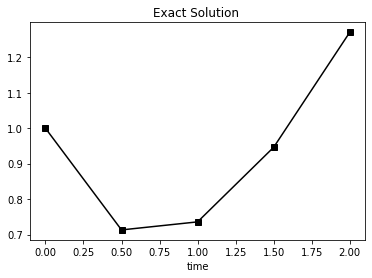

In [4]:
IC=1 # Intial condtion
y1=(IC+1)*np.exp(-t1)+t1-1
fig = plt.figure(figsize=(6,4))
plt.plot(t1,y1,'s-',color='black')
#plt.plot(t2,y2,'o-',color='black')
plt.title('Exact Solution ')
plt.xlabel('time')

## Setting up the initial conditions of the equation
$$ w_{0} = 1 $$

In [5]:
# Initial Condition
RK2_coarse=np.zeros(N1+1)
RK2_coarse[0]=IC

RK3_coarse=np.zeros(N1+1)
RK3_coarse[0]=IC

### 2nd Order Runge Kutta
The general form of the 2nd order Runge Kutta is:
$$ k_{1}=f(t,w),$$
$$ k_{2}=f(t+h,w+hk_{1}), $$
$$ w_{i+1}=w_{i}+\frac{h}{2}(k1+k2). $$

### 3rd Order Runge Kutta
The general form of the 3rd order Runge Kutta is:
$$ k_{1}=f(t,v),$$
$$ k_{2}=f(t+\frac{h}{2},v+\frac{h}{2}k_{1}), $$
$$ k_{3}=f(t + h, v - k_{1}h + 2k_{2}h), $$
$$ v_{n+1} = v_{n} + \frac{h}{6}(k_{1} + 4k_{2} + k_{3}) $$

## Coarse Mesh Methods

In [6]:
# Coarse Mesh

for k in range (0,N1):
    k1=myfun_ty(t1[k],RK3_coarse[k])
    k2=myfun_ty(t1[k]+h1/2,RK3_coarse[k]+h1/2*k1)
    k3=myfun_ty(t1[k]+h1,RK3_coarse[k]-h1*k1+2*h1*k2)
    RK3_coarse[k+1]=RK3_coarse[k]+h1/6*(k1+4*k2+k3)
    
    k1=myfun_ty(t1[k],RK2_coarse[k])
    k2=myfun_ty(t1[k]+h1,RK2_coarse[k]+h1*k1)
    RK2_coarse[k+1]=RK2_coarse[k]+h1/2*(k1+k2)

## Coarse Mesh Results
The plot below shows the exact solution (black) the 2nd order Runge Kutta  $w_{i}$ in blue and the 3rd order Runge Kutta  $v_{i}$ in green.

<function matplotlib.pyplot.show(*args, **kw)>

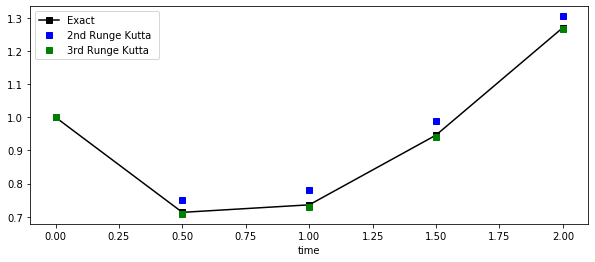

In [7]:
fig = plt.figure(figsize=(10,4))
# --- left hand plot
plt.plot(t1,y1, 's-',color='black',label='Exact')
plt.plot(t1,RK2_coarse,'s',color='blue',label='2nd Runge Kutta ')
plt.plot(t1,RK3_coarse,'s',color='green',label='3rd Runge Kutta ')
plt.xlabel('time')
plt.legend()
plt.show

The table below shows the approximate solutions for the 2nd and 3rd order Runge Kutta, the exact solution, the error of the methods and in the final column the relative truncation error of the two methods
$$ \tau \approx \frac{v_{i} - w_{i}}{h} $$

In [8]:
table = ListTable()
table.append(['time', '2nd RK','3rd RK','Exact','2nd Error','3rd Error','(v_i-w_i)'])
for i in range (0,N1+1):
    table.append([round(t1[i],3), round(RK2_coarse[i],3), 
                  round(RK3_coarse[i],3), round(y1[i],3),
                  round(abs(y1[i]-RK2_coarse[i]),5),round(abs(y1[i]-RK3_coarse[i]),5),
                  round(abs(RK2_coarse[i]-RK3_coarse[i]),5)])

table.append(['Max',' ' ,' ' 
              , ' ',
              round(max(abs(y1-RK2_coarse)),5),round(max(abs(y1-RK3_coarse)),5),
              round(max(abs(RK2_coarse-RK3_coarse)),5)])

table

time,2nd RK,3rd RK,Exact,2nd Error,3rd Error,(v_i-w_i)
0.0,1.0,1.0,1.0,0.0,0.0,0.0
0.5,0.75,0.708,0.713,0.03694,0.00473,0.04167
1.0,0.781,0.73,0.736,0.04549,0.00572,0.05122
1.5,0.988,0.941,0.946,0.04202,0.0052,0.04722
2.0,1.305,1.266,1.271,0.03451,0.0042,0.0387
Max,,,,0.04549,0.00572,0.05122


## Improving the Error
$$ \tau _{i+1} = \frac{y(t_{i+1}) - y(t_{i})}{h} - \phi(t_{i}, y(t_{i}), h) $$
$$ = \frac{y(t_{i+1}) - w_{i}}{h} - \phi(t_{i}, w_{i}, h) $$
$$ = \frac{y(t_{i+1}) - (w_{i} + h\phi(t_{i}, w_{i}, h))}{h} $$
$$ = \frac{y(t_{i+1}) - w_{i+1}}{h}$$

Similarly 
$$ \Upsilon _{i+1} = \frac{y(t_{i+1}) - v_{i+1}}{h}$$
As a consequence
$$ \tau _{i+1} = \frac{y(t_{i+1}) - w_{i+1}}{h}$$
$$ \tau _{i+1} = \frac{(y(t_{i+1}) - v_{i+1}) + (v_{i+1} - w_{i+1})}{h}$$

$$ \tau _{i+1} = \Upsilon _{i+1}(h) + \frac{(v_{i+1} - w_{i+1})}{h}$$

But $\tau _{i+1}(h)$ is $O(h^n)$ and $\Upsilon _{i+1}(h)$ is $O(h^{n+1})$ so the significant factor of $\tau _{i+1}(h)$ must come from $\frac{(v_{i+1} - w_{i+1})}{h}$. This gives us an easily computed approximation of $O(h^n)$ method.
$$ \tau _{i+1} \approx \frac{(v_{i+1} - w_{i+1})}{h}.$$

The object is not to estimate the local truncation error but to adjust step size to keep it within a specified bound. To do this we assume that since  $\tau _{i+1}(h)$ is  $O(h^n)$ a number K independent of h exists with $\tau _{i+1}(h) \approx Kh^n $.  Then the local truncation error produced by applying the nth order method with a new step size  qh can be estimated using the original approximations $w_{i+1}$ and $v_{i+1}$.

$$ \tau _{i+1}(qh) \approx K(qh)^n \approx q^n\tau _{i+1}(h) \approx \frac{q^n}{h}(v_{i+1} - w_{i+1})$$

to bound $\tau _{i+1}(qh)$ by $\epsilon$ we choose q such that
$$ \frac{q^n}{h} \lvert v_{i+1} - w_{i+1} \rvert \approx \tau _{i+1}(qh) \leq \epsilon $$

which leads to
$$ q \leq ( \frac{\epsilon h}{\lvert v_{i+1} - w_{i+1} \rvert})^{1/n} $$

which can be used to control the error.

### EXAMPLE
From the table we have tha max $\lvert v_{i+1} - w_{i+1} \rvert$.
The 2nd order method is of order 2 so  n=3, and  h=0.5. We wish to have an accuracy of  $\epsilon=0.001$, which gives
$$ q \leq (\frac{0.001 x 0.5}{0.05122})^{1/3} $$
$$ q \leq 0.2 $$
Thus the new stepsize is 
$$ h = 0.2 x 0.5 $$


0.21371916894045156


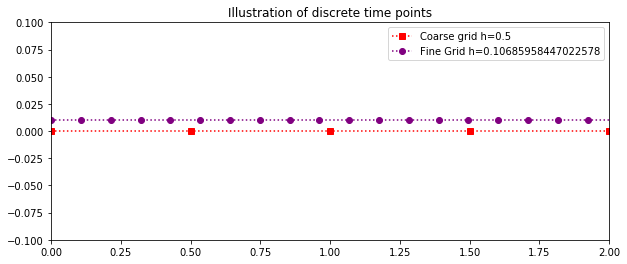

In [9]:
q=(0.001*h1/round(max(abs(RK2_coarse-RK3_coarse)),5))**(1/3)
print(q)
h2=q*h1
t2=np.arange(a,b+h2*1.5,h2)

fig = plt.figure(figsize=(10,4))
plt.plot(t1,0*t1,'s:',color='red',label='Coarse grid h=%s'%(h1))
plt.plot(t2,0.01*np.ones(len(t2)),'o:',color='purple',label='Fine Grid h=%s'%(h2))
plt.xlim((0,2))
plt.ylim((-0.1,0.1))
plt.title('Illustration of discrete time points')
plt.legend()
plt.show()

## Fine Mesh Methods

In [10]:
N2=len(t2)
RK2_fine=np.zeros(N2)
RK2_fine[0]=IC
RK3_fine=np.zeros(N2)
RK3_fine[0]=IC
y2=(IC+1)*np.exp(-t2)+t2-1

for k in range (0,N2-1):
    k1=myfun_ty(t2[k],RK3_fine[k])
    k2=myfun_ty(t2[k]+h2/2,RK3_fine[k]+h2/2*k1)
    k3=myfun_ty(t2[k]+h2,RK3_fine[k]-h2*k1+2*h2*k2)
    RK3_fine[k+1]=RK3_fine[k]+h2/6*(k1+4*k2+k3)
    
    k1=myfun_ty(t2[k],RK2_fine[k])
    k2=myfun_ty(t2[k]+h2,RK2_fine[k]+h2*k1)
    RK2_fine[k+1]=RK2_fine[k]+h2/2*(k1+k2)

## Fine Mesh Results
The plot below shows the exact solution (black) the 2nd order Runge Kutta  $w_{i}$ in blue and the 3rd order Runge Kutta  $v_{i}$ in green.

<function matplotlib.pyplot.show(*args, **kw)>

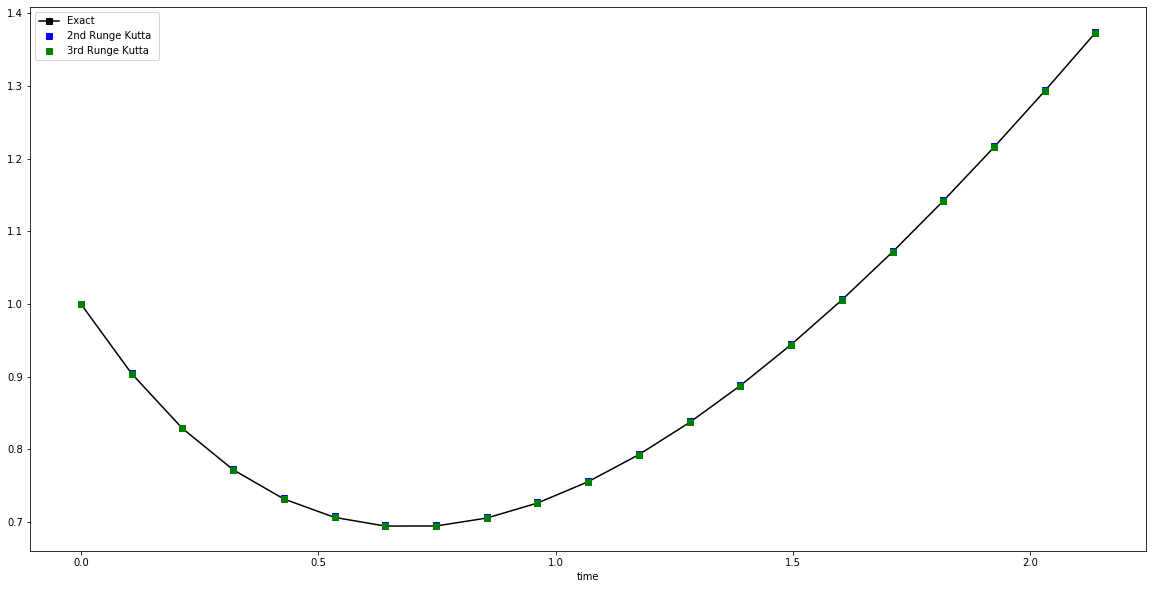

In [14]:
fig = plt.figure(figsize=(20,10))
plt.plot(t2,y2, 's-',color='black',label='Exact')
plt.plot(t2,RK2_fine,'s',color='blue',label='2nd Runge Kutta ')
plt.plot(t2,RK3_fine,'s',color='green',label='3rd Runge Kutta ')
plt.xlabel('time')
plt.legend()
plt.show

In [12]:
table = ListTable()
table.append(['time', '2nd RK','3rd RK','Exact','2nd Error','3rd Error','(v_i-w_i)'])
for i in range (0,N1+1):
    table.append([round(t2[i],3), round(RK2_fine[i],3), round(RK3_fine[i],3), round(y2[i],3),
                  round(abs(y2[i]-RK2_fine[i]),5),round(abs(y2[i]-RK3_fine[i]),5),
                  round(abs(RK2_fine[i]-RK3_fine[i]),5)])
    
table.append(['Max',' ' ,' ' 
              , ' ',
              round(max(abs(y2-RK2_fine)),5),round(max(abs(y2-RK3_fine)),5),
              round(max(abs(RK2_fine-RK3_fine)),5)])
table

time,2nd RK,3rd RK,Exact,2nd Error,3rd Error,(v_i-w_i)
0.0,1.0,1.0,1.0,0.0,0.0,0.0
0.107,0.905,0.904,0.904,0.0004,1e-05,0.00041
0.214,0.83,0.829,0.829,0.00071,2e-05,0.00073
0.321,0.773,0.772,0.772,0.00096,3e-05,0.00099
0.427,0.733,0.732,0.732,0.00115,3e-05,0.00118
Max,,,,0.00152,4e-05,0.00156
